# Linear Regression

$y_i = \alpha + \beta x_i + \epsilon_i$ where $\epsilon_i \sim N(0,\sigma)$

$\implies$ $y_i - \alpha - \beta x_i \sim N(0, \sigma)$ $\implies$ $ y_i \sim N(\alpha + \beta x_i, \sigma)$

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)
import pystan
linear_regression = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
    
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}

model {
    y ~ normal(alpha+beta * x, sigma);
}
"""
data = {'x': [1, 2, 3, 4, 5], 
        'y' : [1, 2, 1.3, 3.75, 2.25],
       'N': 5}

fit = pystan.stan(model_code=linear_regression, data=data,
                  iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_36c78ca0d8f309377dc843e83f519328 NOW.


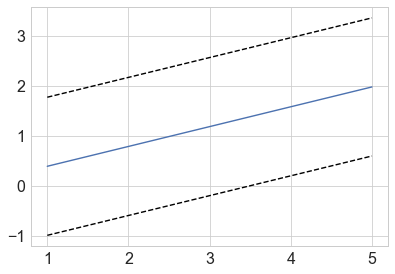

In [16]:
samples = fit.extract(permuted=True)
alpha = np.median(samples['alpha'])
beta = np.median(samples['beta'])
sigma = np.median(samples['sigma'])

xx = np.array([np.min(data['x']), np.max(data['x'])])
plt.plot(xx, xx*beta)
plt.plot(xx, xx*beta + sigma, '--', color='k')
plt.plot(xx, xx*beta - sigma, '--', color='k')


In [10]:
print(fit)

Inference for Stan model: anon_model_36c78ca0d8f309377dc843e83f519328.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha    0.7    0.15    2.6  -4.27  -0.28   0.76   1.71    5.7  300.0   1.01
beta    0.46    0.04   0.78   -1.1   0.14   0.43   0.75   2.05  310.0   1.01
sigma   1.89    0.11   1.77   0.66   1.01    1.4   2.17   5.92  270.0   1.01
lp__   -3.69    0.13   1.95  -8.61  -4.63  -3.18  -2.23  -1.45  217.0   1.01

Samples were drawn using NUTS at Wed May 24 13:03:14 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
